In [4]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
sns.set_style('white')
import seaborn as sns
import time
from pickle import load


import math
from scipy.stats import multivariate_normal
from scipy.stats import norm



In [5]:
k = 8
J = 32

# Load data #

In [33]:
truth_set_full = np.load("../../data/truth_run/f_20_all.npy")

In [35]:
truth_run_split = [i for i in np.array_split(truth_set_full,5,axis=0)]

In [36]:
poly_full = np.load("../../data/simulation_runs/polynomial_param/f_20_all.npy")

In [37]:
poly_split = [i for i in np.array_split(poly_full,5,axis=0)]

In [38]:
rnn_full = np.load("../../data/simulation_runs/rnn/rnn_final/f_20_data/f_20_all.npy")

In [39]:
rnn_split = [i for i in np.array_split(rnn_full,5,axis=0)]

In [40]:
gan_full = np.load("../../data/simulation_runs/gan_gagne/corrected_gans/f_20_all.npy")

In [41]:
gan_split = [i for i in np.array_split(gan_full,5,axis=0)]

# Histogram of Xkt # 

In [42]:
from matplotlib.lines import Line2D
legend_elements = [Line2D([0],[0],color="#4daf4a",lw=4,label="Truth"),
                    Line2D([0],[0],color="#e41a1c",lw=2,label="Polynomial"),
                  Line2D([0],[0],color="#377eb8",lw=2,label="RNN"),
                  Line2D([0],[0],color="#984ea3",lw=2,label="GAN")]

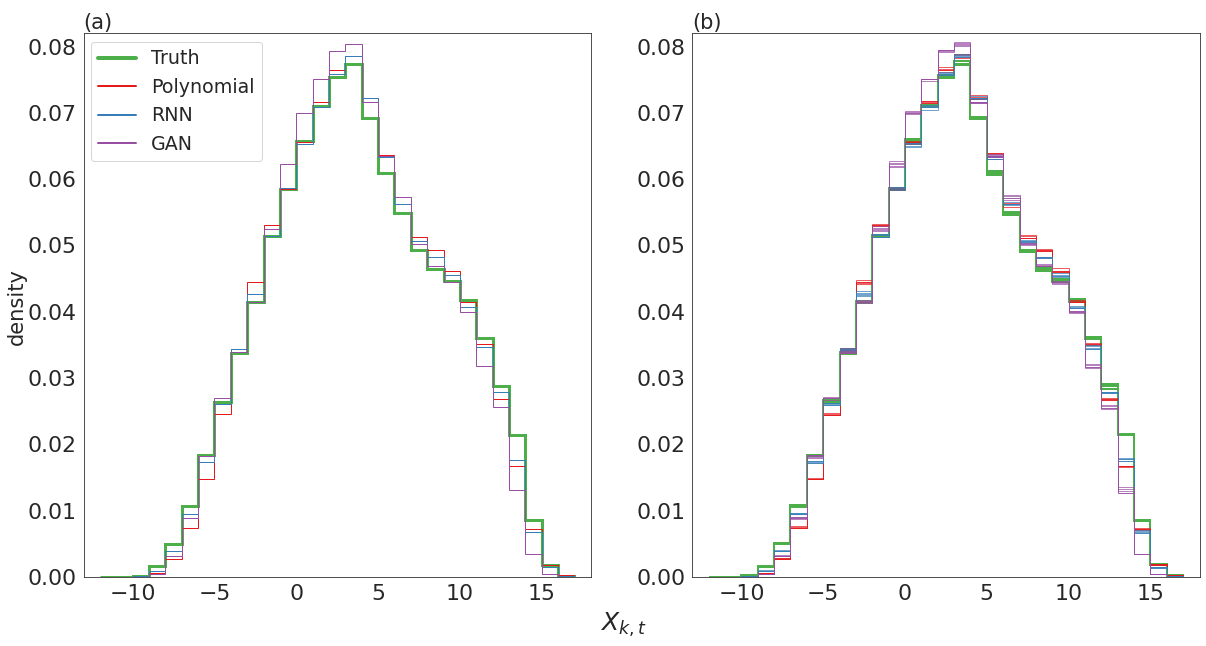

In [43]:
bin_seq = np.linspace(-12,17,30)

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20,10))

plt.rcParams['font.size'] = '22'


ax[0].hist(x=np.ravel(truth_set_full[:,:]),color="#4daf4a",density=True,bins=bin_seq,histtype="step",linewidth=3) #train set truth
ax[0].hist(x=np.ravel(poly_full[:,:]),color="#e41a1c",density=True,bins=bin_seq,histtype="step") #train set truth
ax[0].hist(x=np.ravel(rnn_full[:,:]),color="#377eb8",density=True,bins=bin_seq,histtype="step") #train set truth
ax[0].hist(x=np.ravel(gan_full[:,:]),color="#984ea3",density=True,bins=bin_seq,histtype="step") #train set truth


for j in truth_run_split:
    ax[1].hist(x=np.ravel(j),color="#4daf4a",density=True,bins=bin_seq,histtype="step",linewidth=2) #train set truth
        
for i in poly_split:
    ax[1].hist(x=np.ravel(i),color="#e41a1c",density=True,bins=bin_seq,alpha=0.7,histtype="step") #poly set train
        
for i in rnn_split:
    ax[1].hist(x=np.ravel(i),color="#377eb8",density=True,bins=bin_seq,alpha=0.7,histtype="step") #rnn
        
for i in gan_split:
    ax[1].hist(x=np.ravel(i),color="#984ea3",density=True,bins=bin_seq,alpha=0.7,histtype="step") #gan
  
fig.legend(handles=legend_elements,loc=(0.075,0.75),prop={"size":19})
fig.text(0.5, 0.05, '$X_{k,t}$', ha='center',fontsize="25")
fig.text(0.072, 0.5, 'density', va='center', rotation='vertical',fontsize="21")


ax[0].text(-13,0.085,"(a)",fontsize=21,va="top")
ax[1].text(-13,0.085,"(b)",fontsize=21,va="top")

for i in range(2):
    ax[i].set_xlim([-13,18])
    ax[i].set_ylim([0,0.082])

plt.savefig("climate_eval_histograms.pdf",bbox_inches="tight")
plt.show()


## KL Divergences ##

In [44]:
bin_seq = np.linspace(-12,17,30)


In [45]:
truth_density,_,_ = plt.hist(x=np.ravel(truth_set_full[:,:]),color="grey",density=True,bins=bin_seq,histtype="step") #train set truth
gan_density,_,_ = plt.hist(x=np.ravel(gan_full[:,:]),color="grey",density=True,bins=bin_seq,histtype="step") #train set truth
rnn_density,_,_ = plt.hist(x=np.ravel(rnn_full[:,:]),color="grey",density=True,bins=bin_seq,histtype="step") #train set truth
poly_density,_,_ = plt.hist(x=np.ravel(poly_full[:,:]),color="grey",density=True,bins=bin_seq,histtype="step") #train set truth

plt.close()

In [46]:
truth_density = truth_density + 1e-10
gan_density = gan_density + 1e-10
rnn_density = rnn_density + 1e-10
poly_density = poly_density + 1e-10


In [47]:
#kl between poly and true
np.sum(np.log(truth_density/poly_density)*truth_density)


0.0039037534224236536

In [48]:
#kl between rnn and true
np.sum(np.log(truth_density/rnn_density)*truth_density)


0.0013914664458921932

In [49]:
#kl between gan and true
np.sum(np.log(truth_density/gan_density)*truth_density)


0.010033593500814503